# Linear SVM Classification

 - Support Vectors
 - Separate with a straight line (linearly separable)
 - Margin
 
 
     - Hard margin classification
     
         - Strictly based on those that are at the margin between the two classes.
         - However, this is sensitive to outliers.
         
     - Soft margin classification
     
         - Widen the margin and allow for violation
         - With Python Scikit-learn, you control the width of the margin
         - Control with C hyperparameter
         
             - Smaller C - leads to a wider street, but more margin violations
             - High C - fewer margin violations, but ends up with smaller margin
             
**Note:**
 - SVMs are sensitive to feature scaling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [4]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [5]:
species_to_num = {'setosa': 0,
                 'versicolor': 1,
                 'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']


 - LinearSCV
 
     Similar to SVC with parameter kernel='linear', but impemented in terms of liblinear rather than libsvm so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples
     
     
 - SVC
 
    C-Support Vector Classification.
    
    The implementation os based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to a dataset with more than a couple hundred thousand samples.

In [6]:
C = 1.0
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
clf.predict([[6,2]])

array([2], dtype=int64)

In [8]:
Xv = X.values.reshape(-1, 1)
h = 0.02
X_min, X_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(X_min, X_max, h),
                     np.arange(y_min, y_max, h))

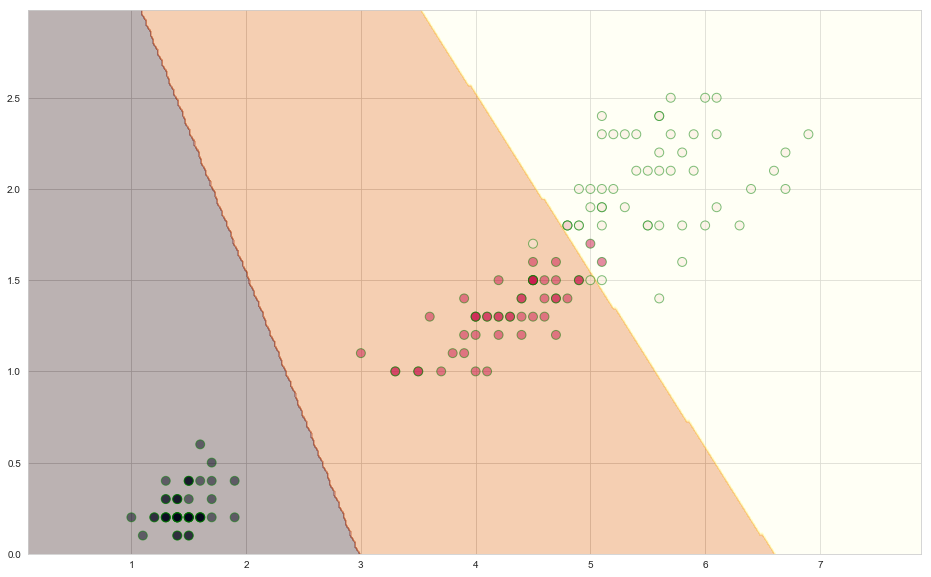

In [9]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16, 10));
ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80,
           alpha=0.5, edgecolor='g');

## Linear SVM Implementation

In [10]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                 'versicolor': 1,
                 'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size=0.8,
                                                   random_state=0)

**Scale Features**

In [11]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [12]:
c = 1.0
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

**Cross Validation within Training Dataset**

In [15]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0: .4f}".format(np.mean(res)))
print("Average SD: \t\t {0: .4f}".format(np.std(res)))

Average Accuracy: 	  0.9501
Average SD: 		  0.0538


In [16]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [17]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

In [18]:
print("Precision Score: \t {0: .4f}".format(precision_score(y_train,
                                                           y_train_pred,
                                                           average='weighted')))
print("Recall Score: \t\t {0: .4f}".format(recall_score(y_train,
                                                      y_train_pred,
                                                      average='weighted')))
print("F1 Score: \t\t {0: .4f}".format(f1_score(y_train,
                                              y_train_pred,
                                              average='weighted')))

Precision Score: 	  0.9500
Recall Score: 		  0.9500
F1 Score: 		  0.9500


**Cross Validation within Test Dataset**

In [19]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [20]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [21]:
print("Precision Score: \t {0: .4f}".format(precision_score(y_test,
                                                            y_test_pred,
                                                            average='weighted')))
print("Recall Score: \t\t {0: .4f}".format(recall_score(y_test,
                                                        y_test_pred,
                                                        average='weighted')))
print("F1 Score: \t\t {0: .4f}".format(f1_score(y_test,
                                                y_test_pred,
                                                average='weighted')))

Precision Score: 	  0.9422
Recall Score: 		  0.9333
F1 Score: 		  0.9290


***

## Polynomial Kernel

In [28]:
C = 1.0
clf = svm.SVC(kernel='poly', degree=3, C=C)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

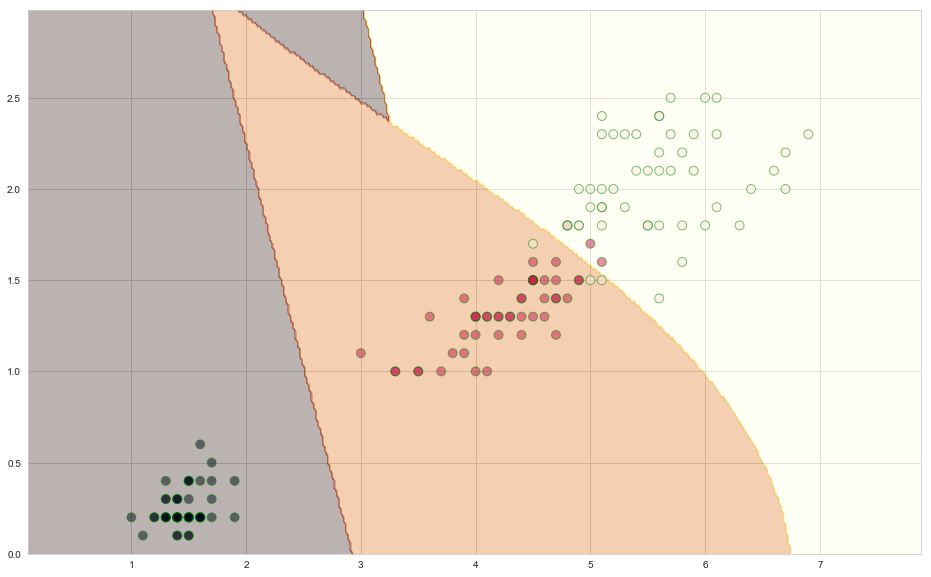

In [29]:
Xv = X.values.reshape(-1, 1)
h = 0.02
X_min, X_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(X_min, X_max, h),
                     np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16, 10));
ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80,
           alpha=0.5, edgecolor='g');

## Polynomial SVM Implementation

In [30]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                 'versicolor': 1,
                 'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size=0.8,
                                                   random_state=0)

**Scale Features**

In [31]:
sc_x = StandardScaler()
x_std_train = sc_x.fit_transform(X_train)

In [32]:
C = 1.0
clf = svm.SVC(kernel='poly', degree=3, C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

**Cross Validation within Train Dataset**

In [33]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0: .4f}".format(np.mean(res)))
print("Average SD: \t\t {0: .4f}".format(np.std(res)))

Average Accuracy: 	  0.9524
Average SD: 		  0.0712


In [34]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [35]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  6, 38]], dtype=int64)

In [36]:
print("Precision Score: \t {0: .4f}".format(precision_score(y_train,
                                                           y_train_pred,
                                                           average='weighted')))
print("Recall Score: \t\t {0: .4f}".format(recall_score(y_train,
                                                      y_train_pred,
                                                      average='weighted')))
print("F1 Score: \t\t {0: .4f}".format(f1_score(y_train,
                                              y_train_pred,
                                              average='weighted')))

Precision Score: 	  0.9570
Recall Score: 		  0.9500
F1 Score: 		  0.9500


**Cross Validation within Test Dataset**